![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


2023-07-03 00:00:00
2022-06-01 00:00:00
#1 The most common time is 1200 with 6462 occurrences.


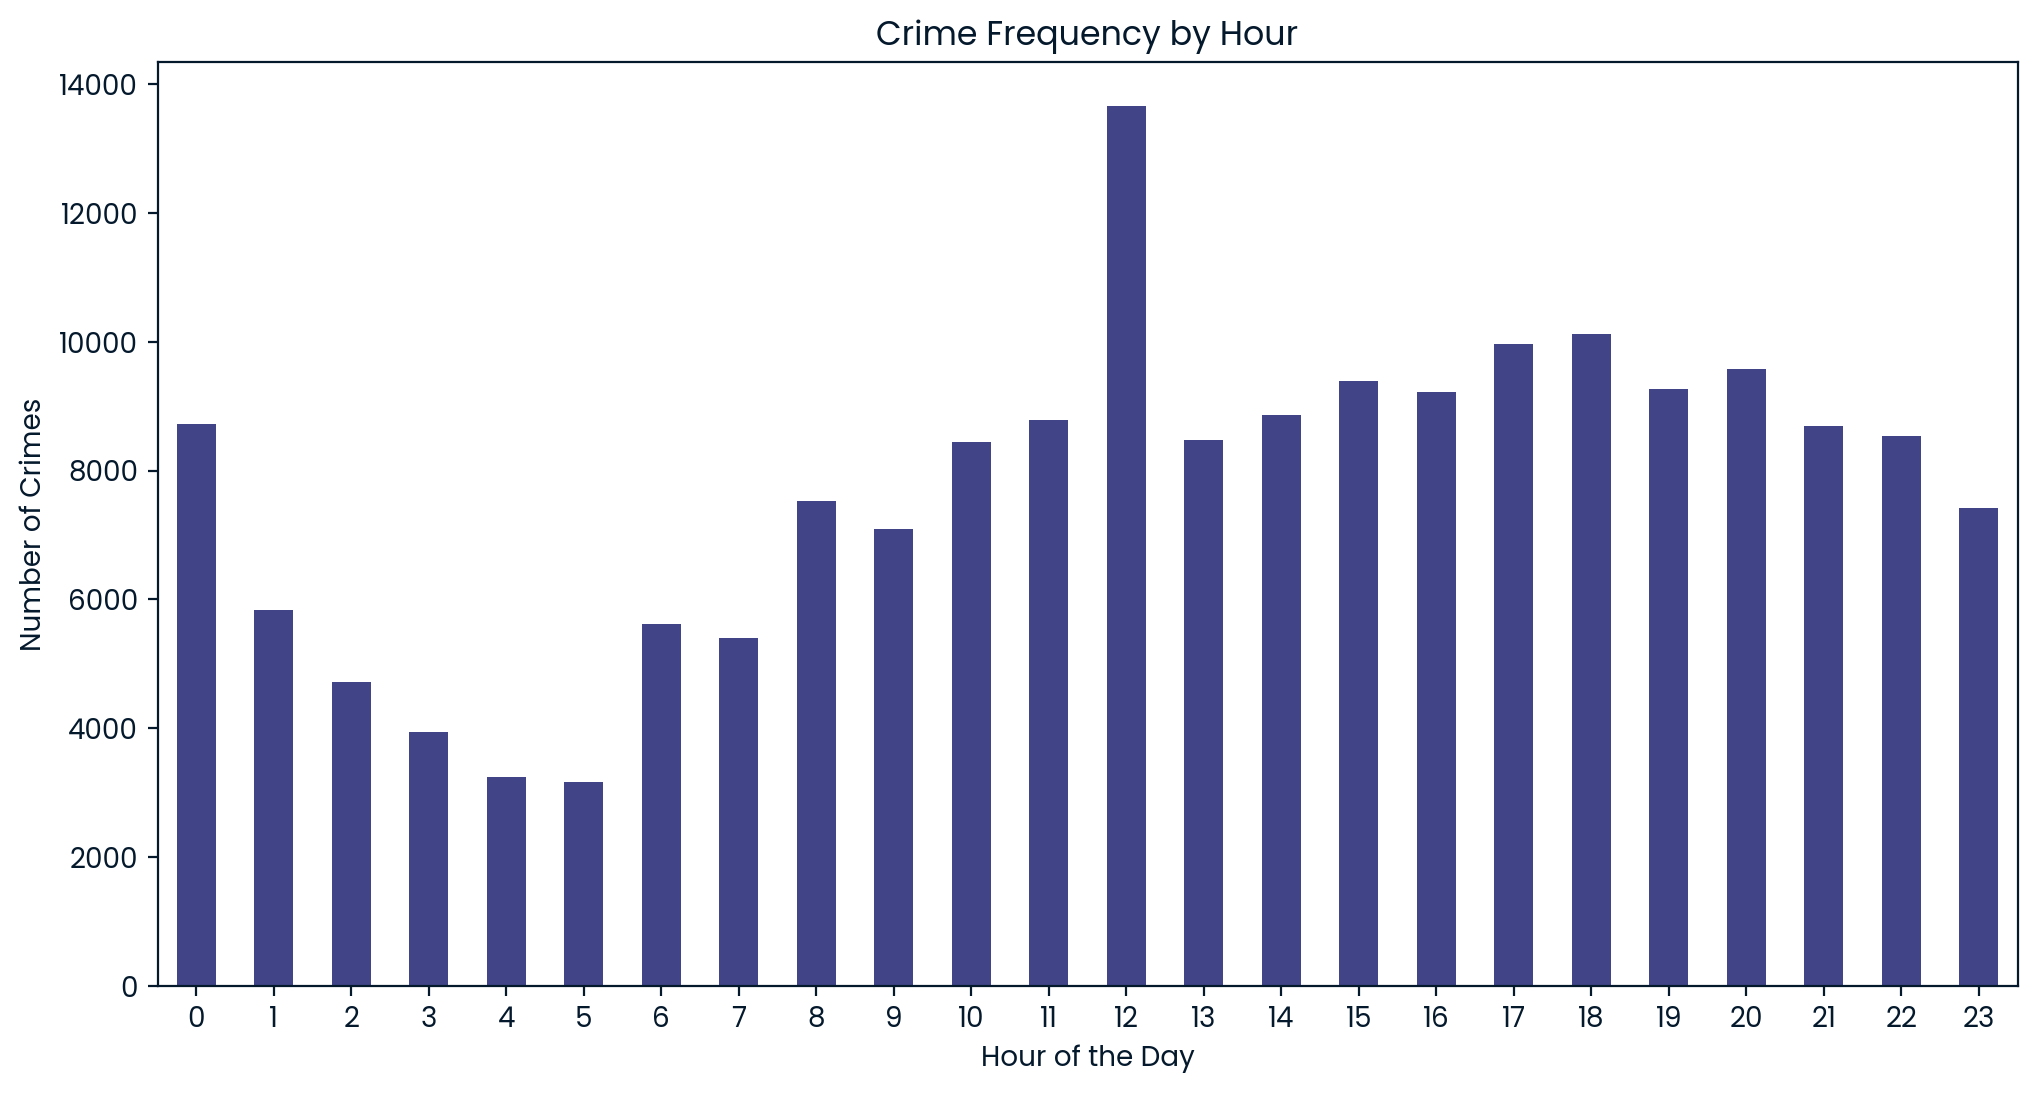

#2 The most common area during 22:00 to 03:59 is Central with 3312 occurrences.

#3 Pandas Series for Victim ages in the Crime Dataset 
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64

#4 Surprising results for Theft of Identity


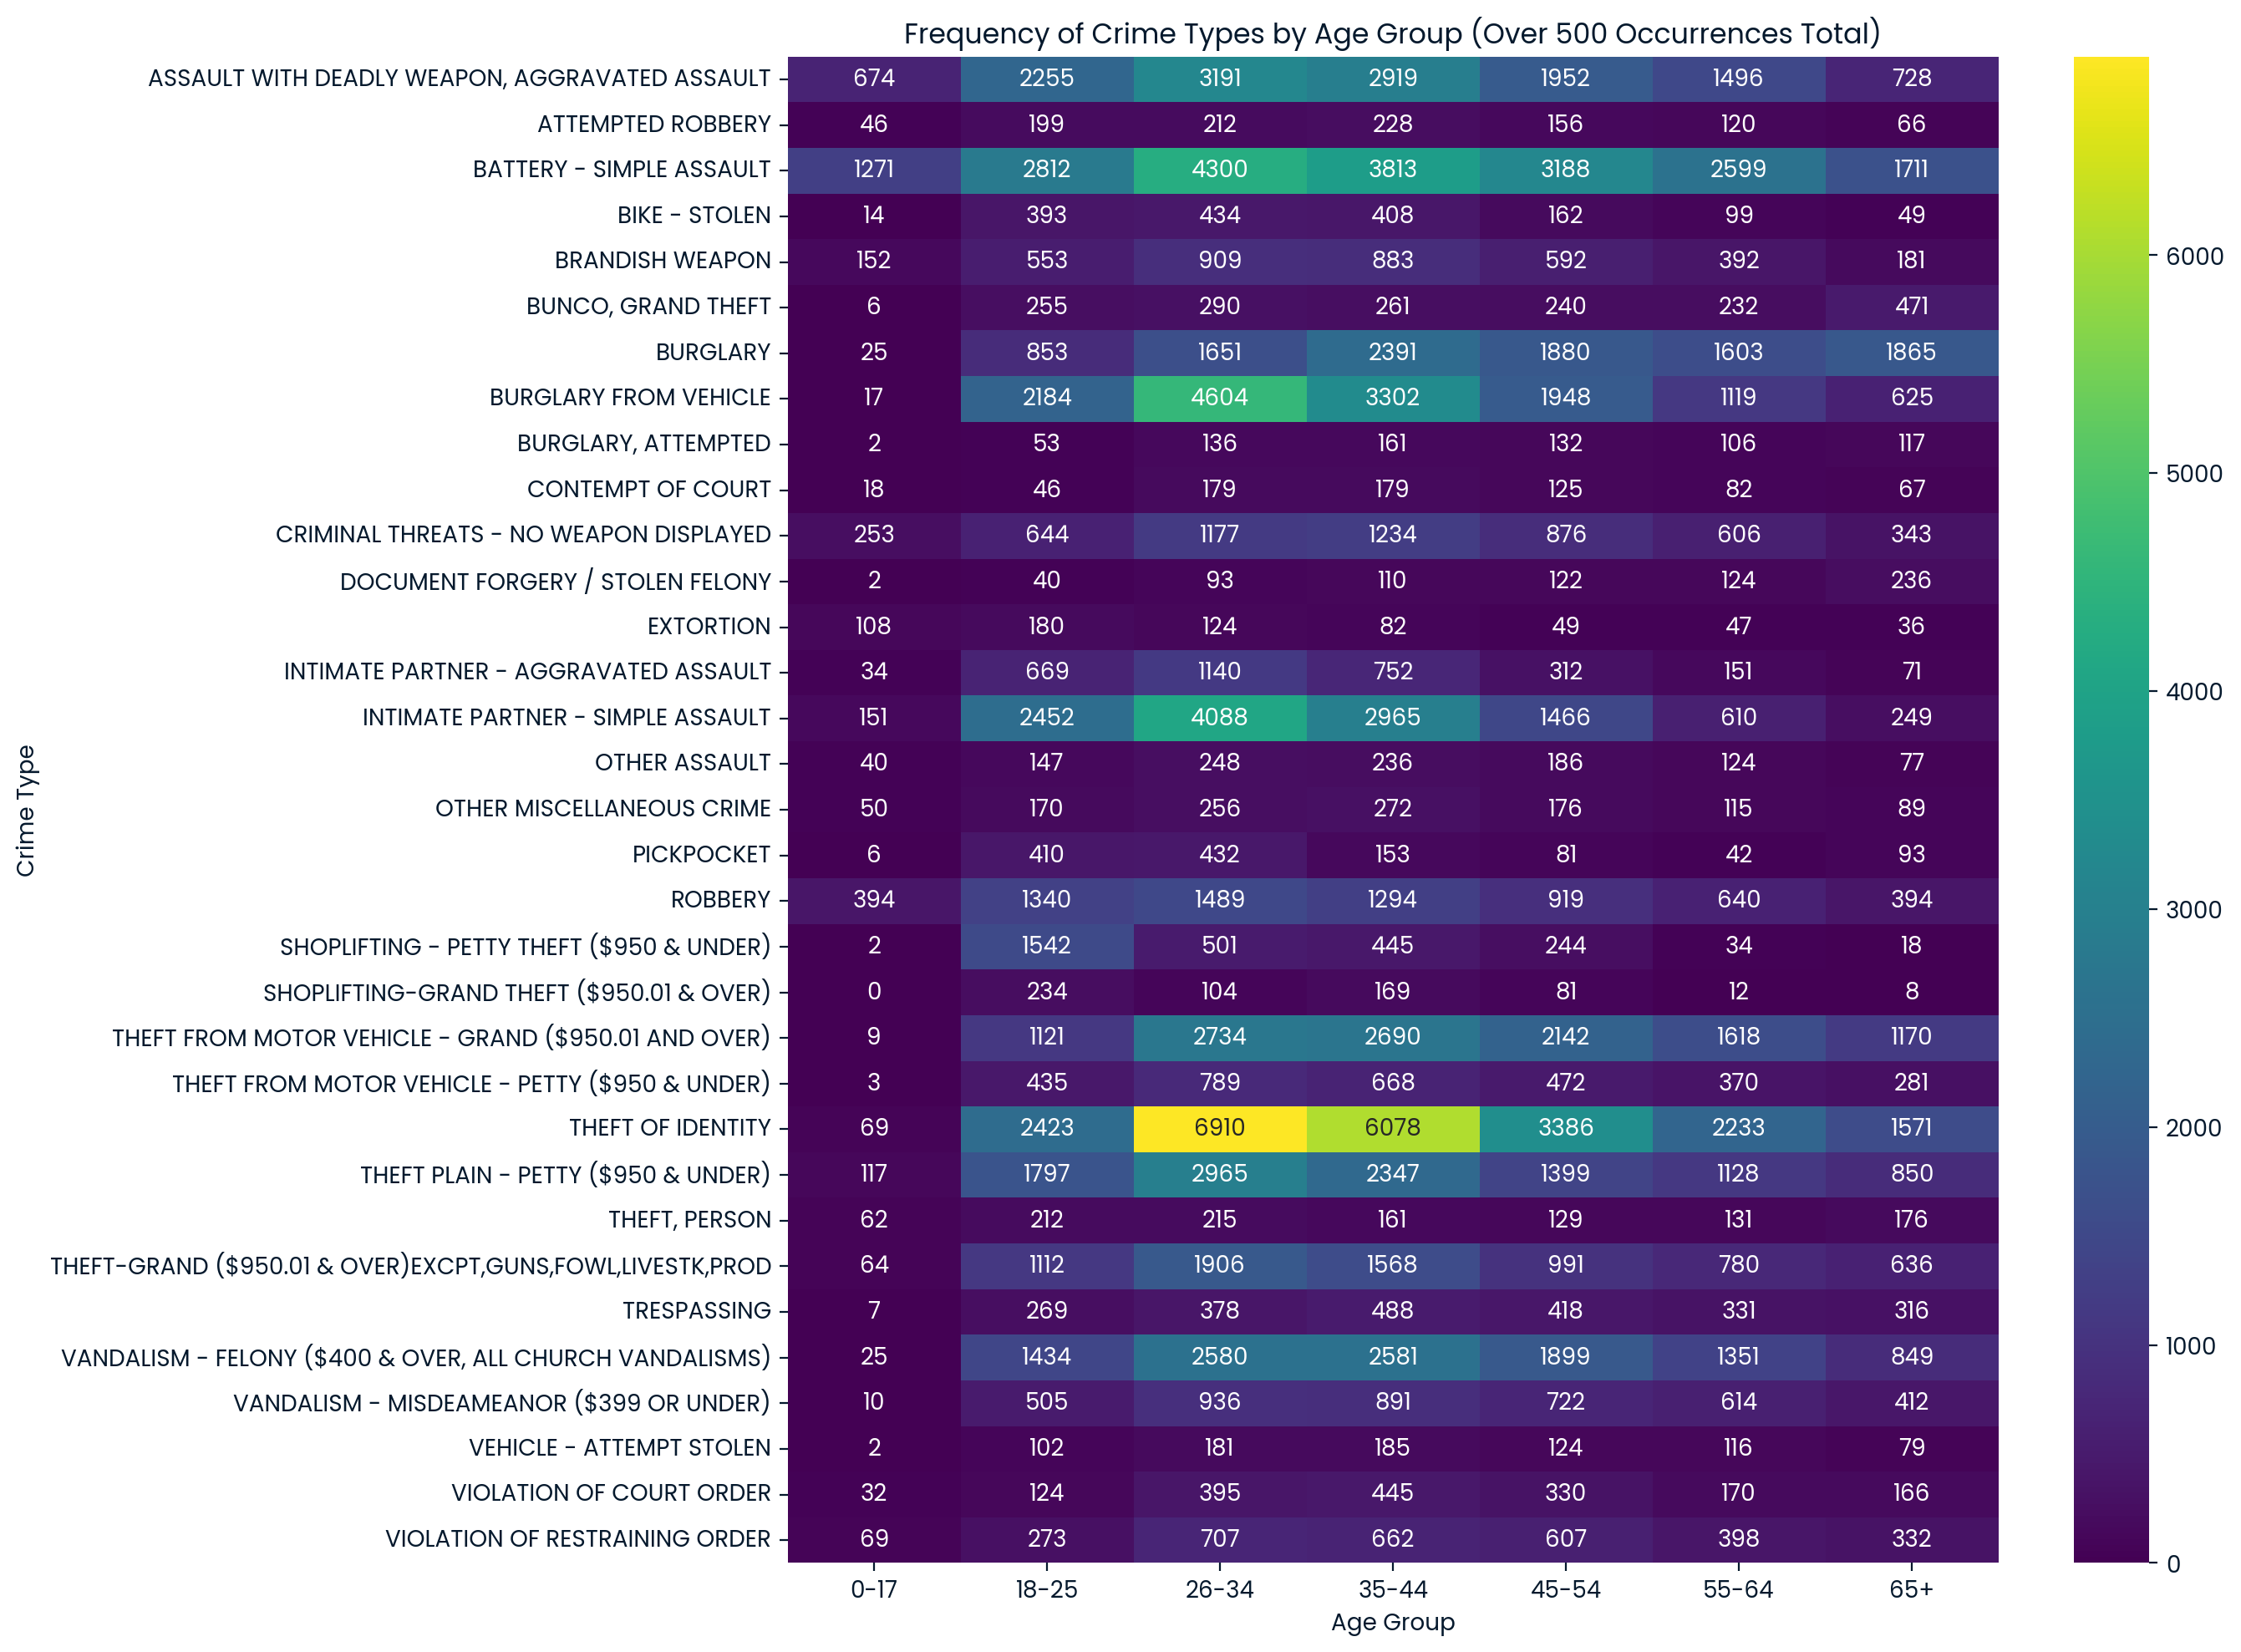

#5 The most frequent crime between 8 PM and 5 AM is 'BATTERY - SIMPLE ASSAULT' with 6177 occurrences.


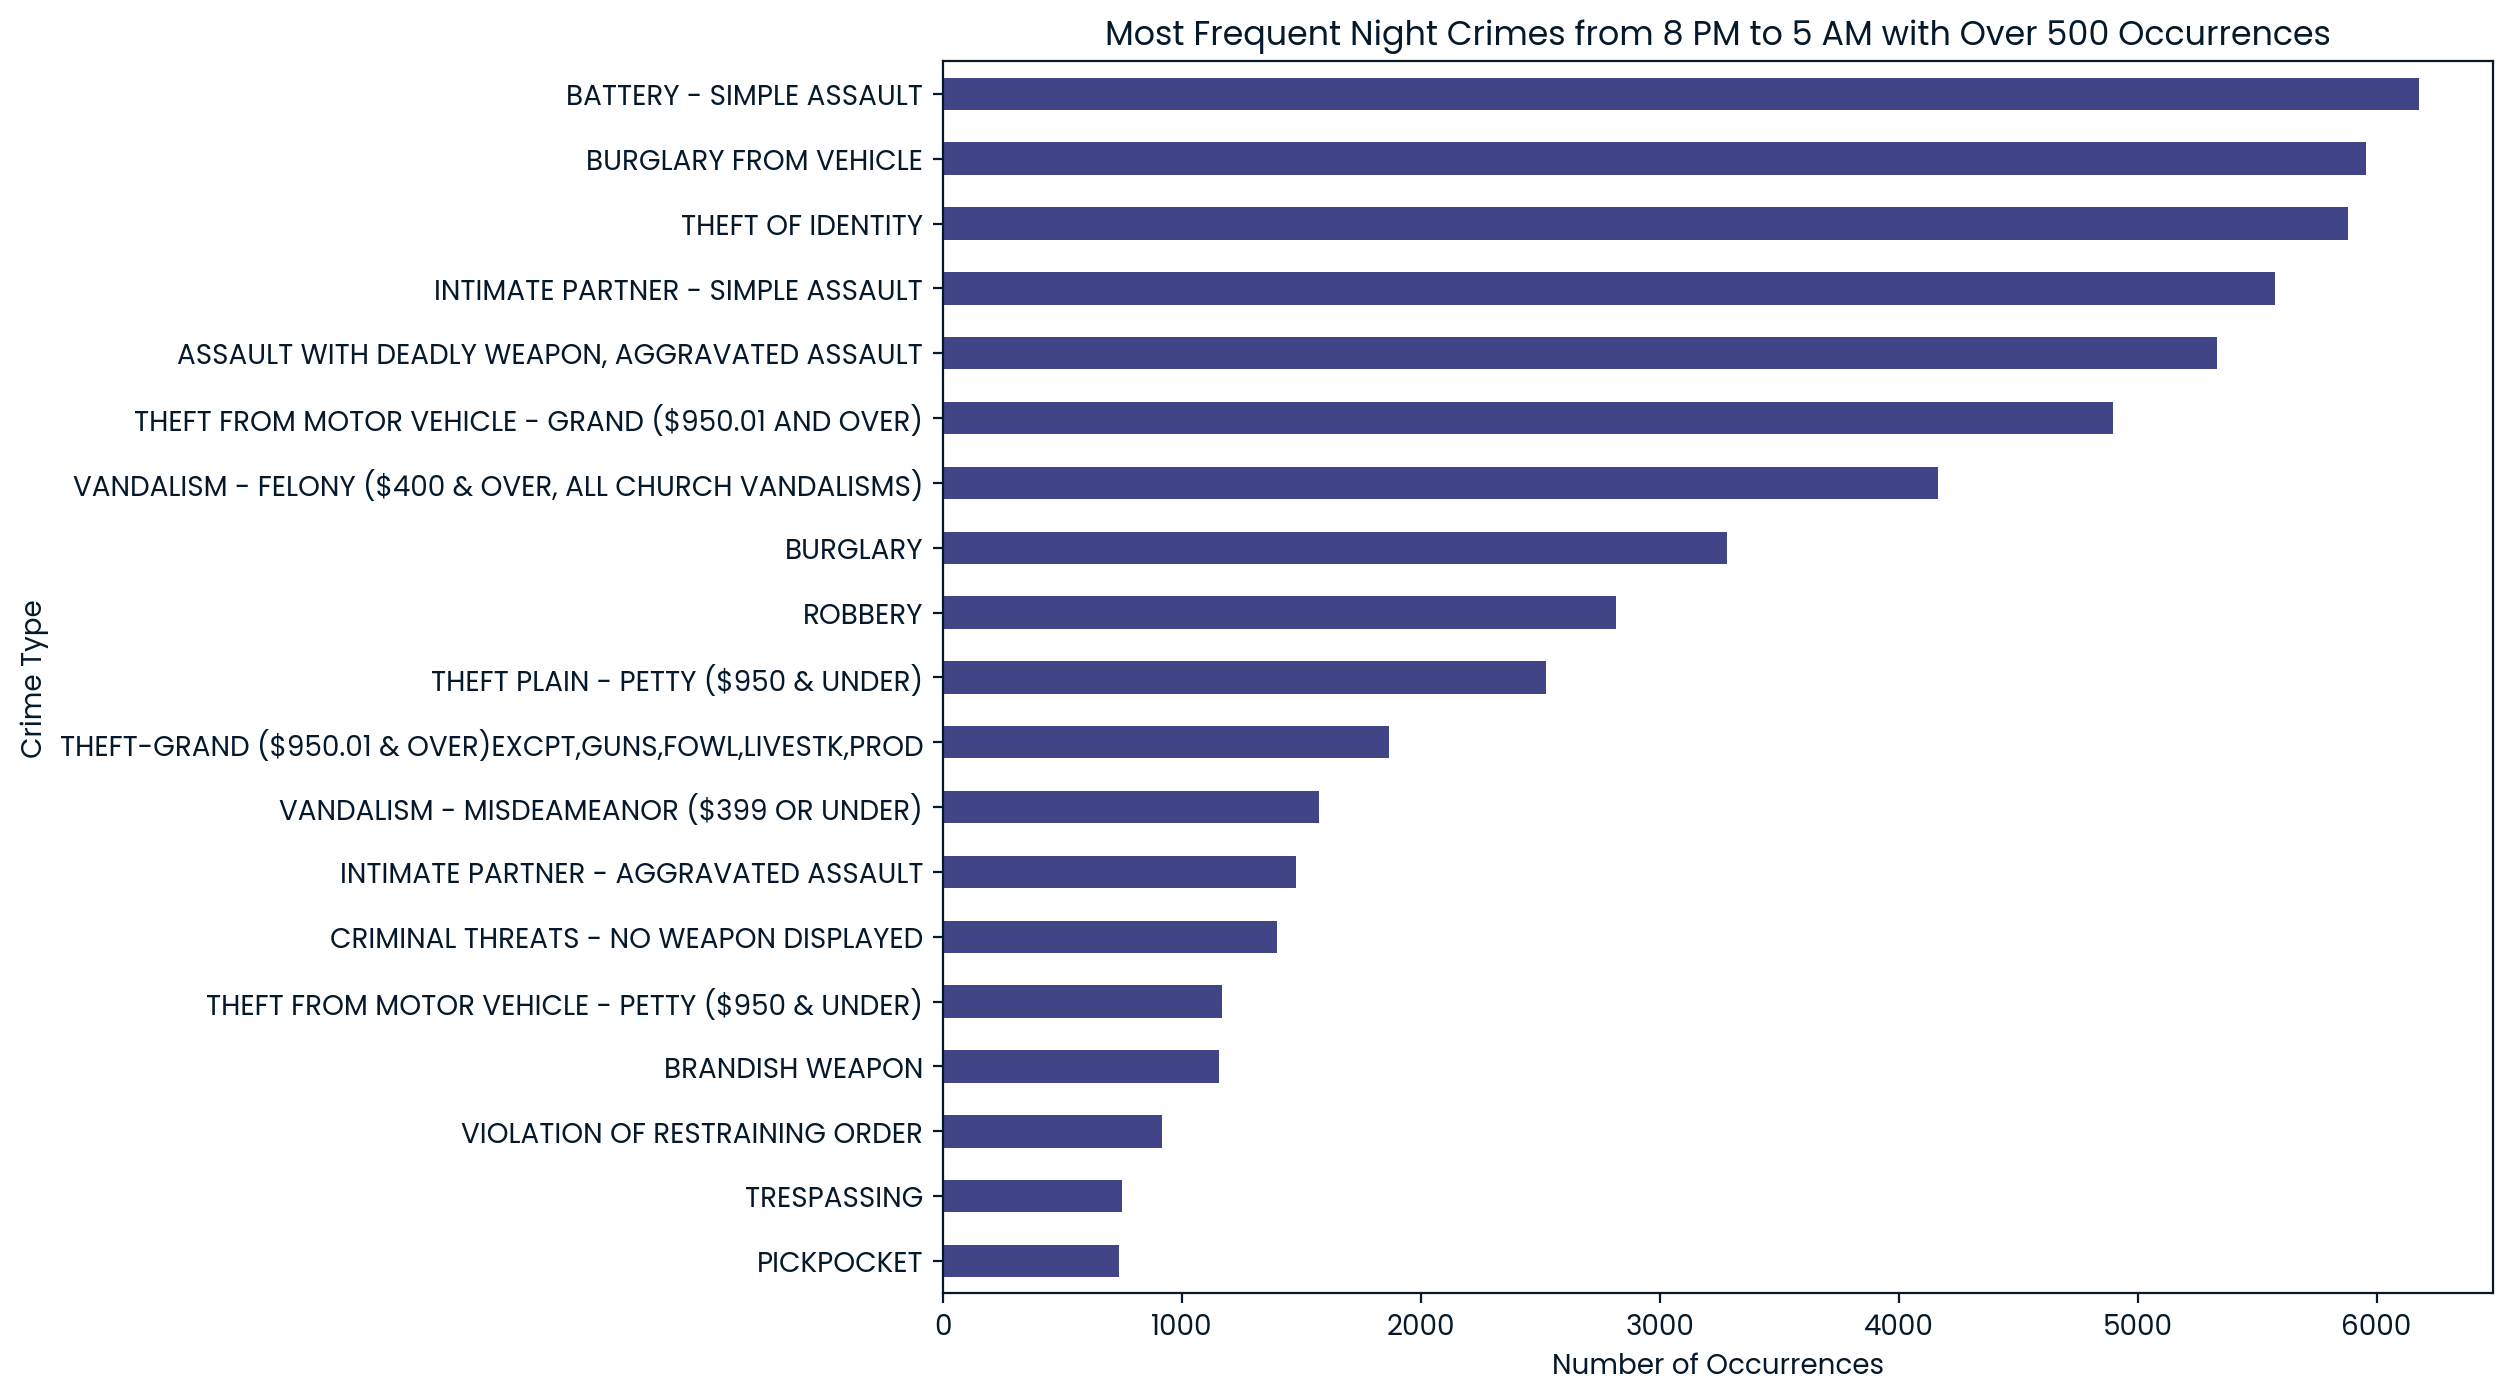

In [11]:

# Understanding how far the dataset goes
# Not necessary but helps with understanding and analyzing the data more efficiently
print(crimes['Date Rptd'].max())
print(crimes['Date Rptd'].min())

# 1
#Which hour has the highest frequency of crimes?

time_counts = crimes['TIME OCC'].value_counts()

most_common_time = time_counts.idxmax()
most_common_count = time_counts.max()

peak_crime_hour1 = int(most_common_time)
peak_crime_hour = 12
print(f"#1 The most common time is {most_common_time} with {most_common_count} occurrences.")

# Visualizing the distribution
# crimes['TIME OCC'] is a string in military time format 'HHMM'
# Extracting the hour part and convert to an integer so I can visualize the distribution throughout the times of day
crimes['HOUR OCC'] = crimes['TIME OCC'].str.slice(start=0, stop=2).astype(int)
# Creating a count for each hour
hour_by_day_counts = crimes['HOUR OCC'].value_counts().sort_index()
# Plot the hourly distribution
plt.figure(figsize=(12, 6))
hour_by_day_counts.plot(kind='bar', color='#414487')
# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Crime Frequency by Hour')
# Set x-ticks to be every hour
plt.xticks(rotation=0)
plt.show()



# 2
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
# Filtering df to only data that happened between the desired times for the analysis
filtered_time_df = crimes[(crimes['TIME OCC'] >= '2200') | (crimes['TIME OCC'] <= '0359')]

#Getting the occurrences by area within the previously created time window filter
area_counts = filtered_time_df['AREA NAME'].value_counts()
most_common_count = area_counts.max()
most_common_area = area_counts.idxmax()
print(f"#2 The most common area during 22:00 to 03:59 is {most_common_area} with {most_common_count} occurrences.")
peak_night_crime_location = most_common_area

# 3
# Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
# Add a new column using pd.cut() to bin values into discrete intervals
# Setting right to true to include the upper limit on all defined bins
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)
victim_ages = crimes['Age Group'].value_counts().sort_index()

# Setting predefined labels as the index to ensure all age groups are displayed in the output.
# This ensures consistent presentation by including bins with zero counts. For instance, if there are no victims aged '0-17',
# it will explicitly show '0-17    0' in the output, unlike without this setting where such a bin would be omitted entirely.

victim_ages.index = labels
victim_ages = crimes['Age Group'].value_counts().sort_index()
# Printing answer for #3
print(f'\n#3 Pandas Series for Victim ages in the Crime Dataset \n{victim_ages}')



# 4 
# Explore the relationship of the crimes committed and the ages of the victims. What is the one with the most ocurrences? 


age_crime_group = crimes.groupby(['Age Group', 'Crm Cd Desc']).size().unstack(fill_value=0)
# Filter out crime types with less than 500 occurrences across all age groups
filtered_age_crime_group = age_crime_group.loc[:, (age_crime_group.sum() > 500)]

# Transpose the filtered data to flip the X and Y axes
transposed_filtered_age_crime_group = filtered_age_crime_group.T

# Sort the age bins to be in ascending order (if not already)
transposed_filtered_age_crime_group = transposed_filtered_age_crime_group[
    ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
]
print('\n#4 Surprising results for Theft of Identity')
# Visualize the transposed heatmap with age bins on the X-axis and Crime type on the Y-axis
plt.figure(figsize=(14, 10))
sns.heatmap(transposed_filtered_age_crime_group, annot=True, fmt="d", cmap='viridis')
plt.title('Frequency of Crime Types by Age Group (Over 500 Occurrences Total)')
plt.xlabel('Age Group')
plt.ylabel('Crime Type')
plt.yticks(rotation=0)  # Rotate y-ticks to show crime types horizontally
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()


# 5
# The police department wants to know what crimes are commited the most after sundown
# This could be very beneficial to redistribute resources and extra training for the officers that work those hours the most

# Filtering the data for times between 8 PM (20) and 5 AM (5)
# Include crimes from 20:00 to 23:59 and 00:00 to 05:00
# I previously created the crimes['HOUR OCC'] for question #2 

night_crimes = crimes[(crimes['HOUR OCC'] >= 20) | (crimes['HOUR OCC'] <= 5)]
crime_counts = night_crimes['Crm Cd Desc'].value_counts()

# Find the crime type with the highest frequency
most_frequent_crime = crime_counts.idxmax()
most_frequent_count = crime_counts.max()

print(f"#5 The most frequent crime between 8 PM and 5 AM is '{most_frequent_crime}' with {most_frequent_count} occurrences.")


#visual 
# Filter out crimes with fewer than 500 instances to avoid clutter
filtered_crime_counts = crime_counts[crime_counts >= 500].sort_values(ascending=True)

plt.figure(figsize=(10, 8))
filtered_crime_counts.plot(kind='barh', color='#414487')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.title('Most Frequent Night Crimes from 8 PM to 5 AM with Over 500 Occurrences')
plt.show()